# Milestone 3 Visualizations

In [2]:
# Import libraries
import numpy as np
import collections
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import sklearn.linear_model as sk
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline

/Users/JohnBowers/anaconda/lib/python2.7/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [3]:
# Load cleaned data from Dropbox
df = pd.read_csv('https://www.dropbox.com/s/80ya9insucxch7e/cleaned_data.csv?dl=1', index_col=0) 
# print some data to examine
df.head(n=5)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Calculate helpfulness as HelfulnessNumerator/HelpfulnessDenominator
helpfulness = []
for index, row in df.iterrows():
    if row['HelpfulnessDenominator'] != 0:
        helpfulness.append(float(row['HelpfulnessNumerator'])/row['HelpfulnessDenominator'])

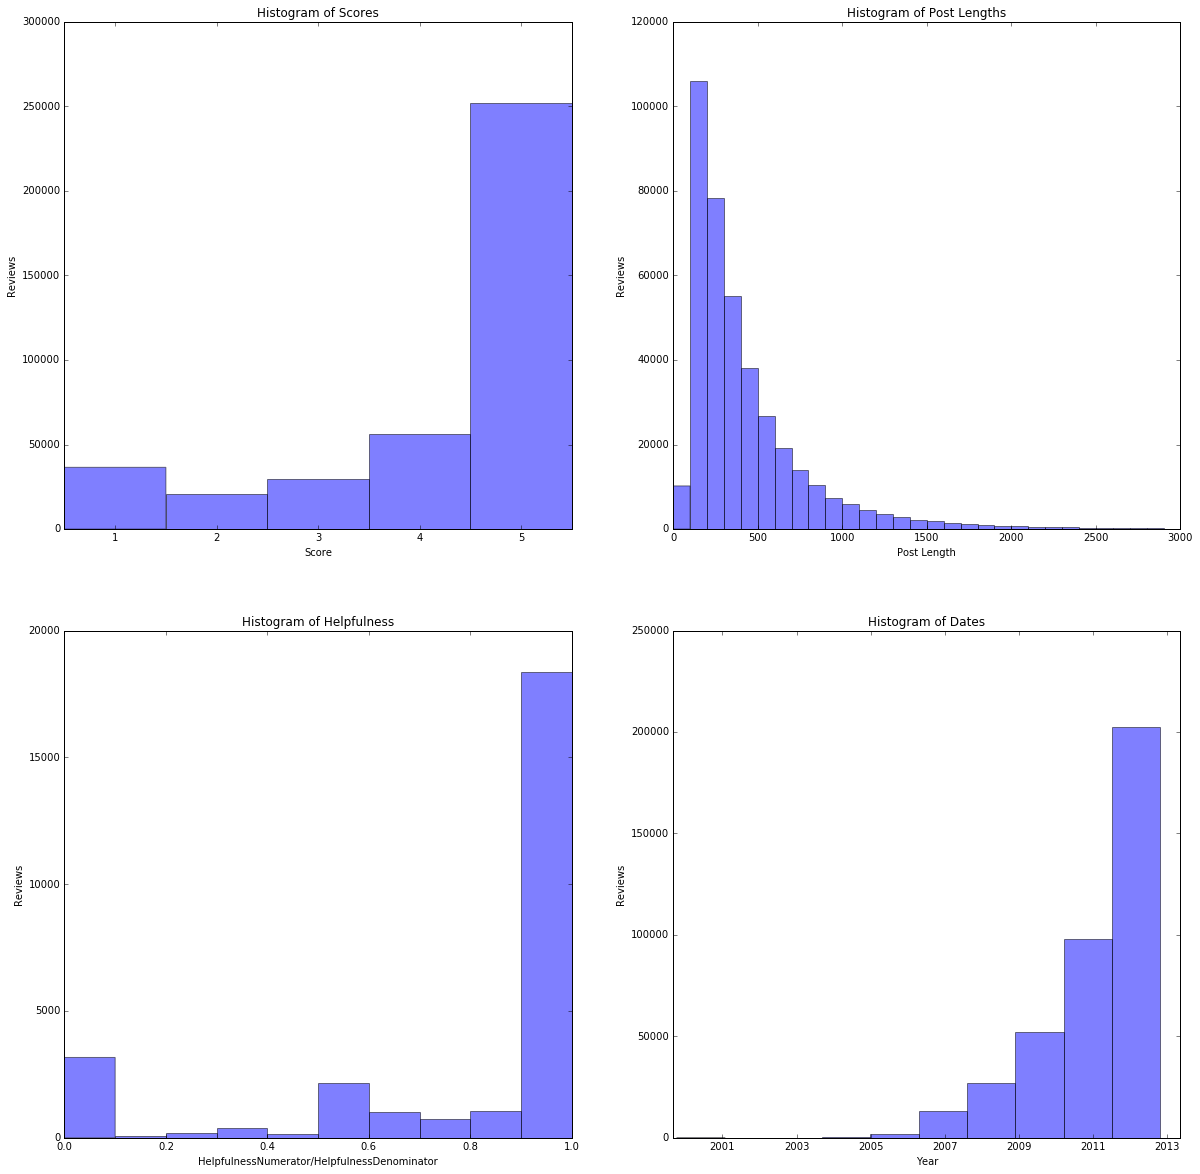

In [30]:
### Overview Histograms - MJK ###

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# Histogram of “score”
ax1.hist(df['Score'], bins=[1,2,3,4,5,6], color='b', alpha=0.5, align='left')
ax1.set_title("Histogram of Scores")
ax1.set_xlabel("Score")
ax1.set_ylabel("Reviews")
ax1.set_xlim(.5,5.5)

# Histogram of post length
post_lengths = []
for p in df['Text']:
    length = len(p)
    post_lengths.append(length)
    
ax2.hist(post_lengths, bins=range(0, 3000, 100), color='b', alpha=0.5)
ax2.set_title("Histogram of Post Lengths")
ax2.set_xlabel("Post Length")
ax2.set_ylabel("Reviews")


# Histogram of HelpfulnessNumerator/HelpfulnessDenominator
ax3.hist(helpfulness, color='b', alpha=0.5, range=[0,1])
ax3.set_title("Histogram of Helpfulness")
ax3.set_xlabel("HelpfulnessNumerator/HelpfulnessDenominator")
ax3.set_ylabel("Reviews")


# Histogram of time
mpl_data = matplotlib.dates.epoch2num(df['Time'])

ax4.hist(mpl_data, color='b', alpha=0.5)
locator = matplotlib.dates.AutoDateLocator()
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(matplotlib.dates.AutoDateFormatter(locator))
ax4.set_title("Histogram of Dates")
ax4.set_xlabel("Year")
ax4.set_ylabel("Reviews")


In [38]:
print df['Score'].mean(), df['Score'].median(), df['Score'].std()
print sum(post_lengths)/float(len(post_lengths)), sorted(post_lengths)[len(post_lengths)/2], np.std(post_lengths)
print sum(helpfulness)/float(len(helpfulness)), sorted(helpfulness)[len(helpfulness)/2], np.std(helpfulness)


4.17877615272 5.0 1.31274880448
434.901875581 304 435.197351052
0.799182401325 1.0 0.33922018186


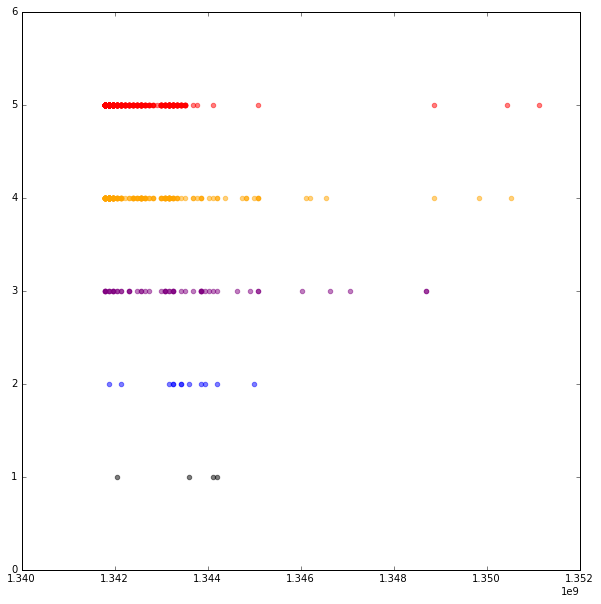

In [80]:
major_products = df.ProductId.value_counts()[:2000].keys().values

quaker = df[df.ProductId == 'B007JFMH8M']

plt.figure(figsize=(10,10))

plt.scatter(quaker[quaker['Score'] == 1]['Time'], quaker[quaker['Score'] == 1]['Score'], color='black', alpha=0.5)
plt.scatter(quaker[quaker['Score'] == 2]['Time'], quaker[quaker['Score'] == 2]['Score'], color='blue', alpha=0.5)
plt.scatter(quaker[quaker['Score'] == 3]['Time'], quaker[quaker['Score'] == 3]['Score'], color='purple', alpha=0.5)
plt.scatter(quaker[quaker['Score'] == 4]['Time'], quaker[quaker['Score'] == 4]['Score'], color='orange', alpha=0.5)
plt.scatter(quaker[quaker['Score'] == 5]['Time'], quaker[quaker['Score'] == 5]['Score'], color='r', alpha=0.5)

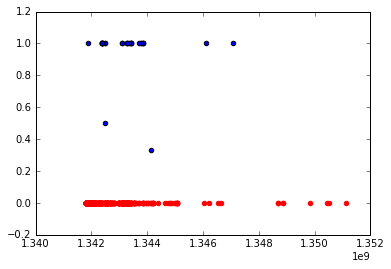

In [83]:
helpfulness = []
time = []
not_rated = []

for row in quaker.iterrows():
    if row[1]['HelpfulnessDenominator'] != 0:
        helpfulness.append(row[1]['HelpfulnessNumerator']/float(row[1]['HelpfulnessDenominator']))
        time.append(row[1]['Time'])
    else:
        not_rated.append(row[1]['Time'])

plt.scatter(time, helpfulness)
plt.scatter(not_rated, np.zeros(len(not_rated)), color='red')
    
    